# Employee Exit Survey

## The Client
TAFE and DETE are vocational colleges in Australia. They have been doing exit surveys for a while and have now gathered a dataset of about 1600 results which they would like analysed. The client is focussed on internal contributing factors.

## Aims of Analysis: Dissatisfaction
The client has asked for a report to help them understand the results of their recent exit survey.

They wish to understand the profile of employees who cite dissatisfaction as a contributing factor to their exit from the organisation.

Leadership wants to understand where to target retention improvement strategies.

## Conclusions: Age and Dissatisfaction
There is a significant increase in dissatisfaction amongst older employees of both TAFE and DETE compared to young employees.

Management should target retention improvement strategies at older employees.

## Notebooks and Reports
The following notebooks and documents are part of this anaylsis:

### Jupyter Notebook Filename: Summary
- [employee_exit_survey_cleaning_1.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_cleaning_1.ipynb): Columns drops, missing data, renaming columns, tidying data for consistency
- [employee_exit_survey_cleaning_2.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_cleaning_2.ipynb): Adding calculated columns, adding category columns, further drops
- [employee_exit_survey_correlation.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_correlation.ipynb): Investigating correlations to guide analysis
- [employee_exit_survey_gender.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_gender.ipynb): Aggregation by pivot_table of gender subsets, visualisations
- [employee_exit_survey_age.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_age.ipynb): Aggregation by pivot_table of age subsets, visualisations
- [employee_exit_survey_conflict.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_conflict.ipynb): Exploration of conflict as a contributory factor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np

In [2]:
survey = pd.read_csv('employee_exit_survey_clean_final.csv')

In [3]:
survey.head()

,Unnamed: 0,index,cf_to_private_sector,cf_health,cf_family,cf_dept_dissatisfaction,cf_job_dissatisfaction,cf_interpersonal_conflict,cf_other,institute_recognition,institute_job_security,dept_workload,dept_work_life_balance,dept_work_environment,gender,age,service_years,exit_year,college,cf_dept_or_job_dissatisfaction
0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,Female,26–30,1 to 2 Years,2010,TAFE,False
1,1,1,False,False,False,False,False,False,False,True,True,True,False,True,Female,NaN,NaN,2010,TAFE,False
2,2,2,False,False,False,False,False,False,False,False,False,False,False,False,Female,NaN,NaN,2010,TAFE,False
3,3,3,False,False,False,False,False,False,False,False,False,True,True,True,Female,NaN,NaN,2010,TAFE,False
4,4,4,True,False,False,False,False,False,False,True,False,True,True,True,Male,41–45,3 to 4 Years,2010,TAFE,False


# Exploratory Charts
From the initial exploration of correlations, there is a clear tendency for older employees to be more dissatisfied than younger ones.

It would be beneficial to explore:
- Measure the scale of increase in dissatisfaction as age increases
- Link to length of service to see if this is a factor (note initial correlation analysis did not suggest length of servce was correlated directly to dissatisfaction)
- Compare TAFE to DETE because there were clear differences.

## Baseline Age Charts
These charts describe the age and dissatisfaction profiles of the two colleges.

<AxesSubplot:title={'center':'Dept and Job Dissatisfaction as a CF by Age'}, xlabel='age'>

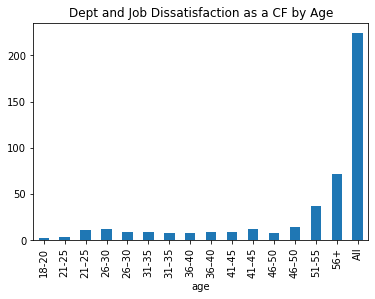

In [4]:
pv_age = survey.pivot_table(values='cf_dept_or_job_dissatisfaction', index='age', aggfunc=np.sum, margins=True)
pv_age.plot(kind='bar', xlim=((0,10)), title='Dept and Job Dissatisfaction as a CF by Age', legend=False)

<AxesSubplot:title={'center':'TAFE Age Distribution'}>

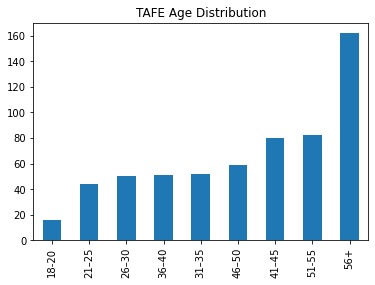

In [5]:
values = survey.loc[survey['college'] == 'TAFE','age']
values.value_counts().sort_values(ascending=True).plot(kind='bar', title='TAFE Age Distribution')

  Age Group  Total in Group  Dissatisfied in Group
0       56+             162                     21
1     51-55             106                     16
2     41–45              82                     14
3     46–50              80                     13
4     31–35              59                     12
5     36–40              52                     11
6     26–30              51                      9
7     21–25              50                      9
8     18-20              44                      8
  Age Group  Total in Group  Dissatisfied in Group
0       56+             396                     51
1     51-55             103                     24
2     41–45              63                     12
3     46–50              61                      9
4     31–35              57                      9
5     36–40              51                      8
6     26–30              40                      8
7     21–25              39                      4
8     18-20              11    

<AxesSubplot:>

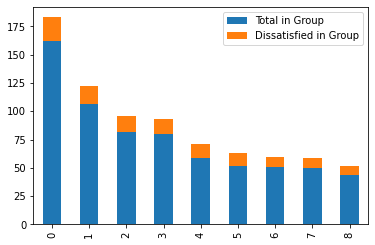

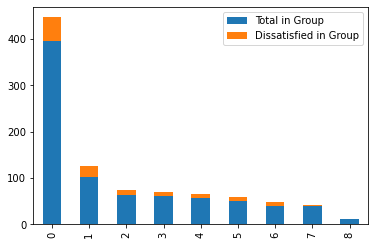

In [81]:
# List of the standardised age categories from the original dataset - both TAFE and DETE use the same.
x_buckets = survey.loc[survey['college'] == 'TAFE','age'].value_counts().index.tolist()

# List of the total number of people in each age category.
tafe_age_values = survey.loc[survey['college'] == 'TAFE','age'].value_counts(dropna=False)
dete_age_values = survey.loc[survey['college'] == 'DETE','age'].value_counts(dropna=False)

# 
tafe_survey = survey[survey['college'] == 'TAFE']
dete_survey = survey[survey['college'] == 'DETE']

tafe_diss_values = tafe_survey.loc[survey['cf_dept_or_job_dissatisfaction'] == True,'age'].value_counts(dropna=False)
dete_diss_values = dete_survey.loc[survey['cf_dept_or_job_dissatisfaction'] == True,'age'].value_counts(dropna=False)

tafe_frame = pd.DataFrame(list(zip(x_buckets,tafe_age_values,tafe_diss_values)), columns =['Age Group', 'Total in Group', 'Dissatisfied in Group'])
print(tafe_frame)

dete_frame = pd.DataFrame(list(zip(x_buckets,dete_age_values,dete_diss_values)), columns =['Age Group', 'Total in Group', 'Dissatisfied in Group'])
print(dete_frame)

tafe_frame.plot(kind='bar', stacked=True)
dete_frame.plot(kind='bar', stacked=True)

In [82]:
tafe_frame['Satisfied or Other'] = tafe_frame['Total in Group'] - tafe_frame['Dissatisfied in Group']
print(tafe_frame)
dete_frame['Satisfied or Other'] = dete_frame['Total in Group'] - dete_frame['Dissatisfied in Group']
print(dete_frame)

  Age Group  Total in Group  Dissatisfied in Group  Satisfied or Other
0       56+             162                     21                 141
1     51-55             106                     16                  90
2     41–45              82                     14                  68
3     46–50              80                     13                  67
4     31–35              59                     12                  47
5     36–40              52                     11                  41
6     26–30              51                      9                  42
7     21–25              50                      9                  41
8     18-20              44                      8                  36
  Age Group  Total in Group  Dissatisfied in Group  Satisfied or Other
0       56+             396                     51                 345
1     51-55             103                     24                  79
2     41–45              63                     12                  51
3     

In [85]:
def perc_tafe(col):
    div = col / tafe_frame['Total in Group']
    return div*100

def perc_dete(col):
    div = col / dete_frame['Total in Group']
    return div*100

columns = ['Dissatisfied in Group','Satisfied or Other']
tafe_frame_perc = tafe_frame[columns].apply(perc_tafe)
dete_frame_perc = dete_frame[columns].apply(perc_dete)

print(tafe_frame_perc)
print(dete_frame_perc)


   Dissatisfied in Group  Satisfied or Other
0              12.962963           87.037037
1              15.094340           84.905660
2              17.073171           82.926829
3              16.250000           83.750000
4              20.338983           79.661017
5              21.153846           78.846154
6              17.647059           82.352941
7              18.000000           82.000000
8              18.181818           81.818182
   Dissatisfied in Group  Satisfied or Other
0              12.878788           87.121212
1              23.300971           76.699029
2              19.047619           80.952381
3              14.754098           85.245902
4              15.789474           84.210526
5              15.686275           84.313725
6              20.000000           80.000000
7              10.256410           89.743590
8               9.090909           90.909091


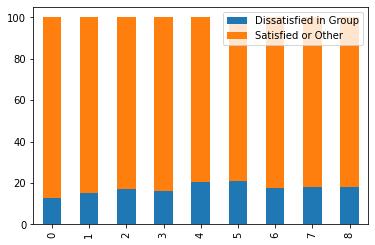

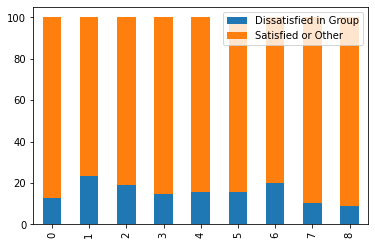

In [86]:
tafe_frame_perc.plot(kind='bar', stacked=True)
plt.show()
dete_frame_perc.plot(kind='bar', stacked=True)
plt.show()

# Conclusions

There is no correlation between older employees and dissatisfaction. Older employees make a significant portion of the population which initially suggested that there may be a dissatisfaction problem in older employees. However, once adjusted to percentages in each age bucket, it is clear that there are no negative trends in that age group.

At TAFE, dissatisfaction is well distributed and there are no discernable patterns.

At DETE, there is perhaps a bulge at the yonger end in 21-25 year olds, but it is likely not significant.

